In [1]:
from datetime import datetime

import pandas as pd
import seaborn
from utils import *

DATA_PATH = "../Data/"

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoinecrettenand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoinecrettenand/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Exploratory Analysis

## Read data from CSV
We will perform exploratory analysis on tweets embedded with polarity metric.

In [2]:
sentiment_analysis_datapath = f"{DATA_PATH}preprocessed/"
# Model name parameter, from [TextBlob, Vader, BERT]
MODEL = 'TextBlob'
# Columns where are located variables related to sentiment analysis
COLUMNS = ['quotation_polarity', 'quotation_subjectivity']

df_obama_2012_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2012_obama_quotes_{MODEL}_processed.csv')
df_obama_2012_all_quotes.name = 'Obama_2012'
df_romney_2012_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2012_romney_quotes_{MODEL}_processed.csv')
df_romney_2012_all_quotes.name = 'Romney_2012'
df_trump_2016_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2016_trump_quotes_{MODEL}_processed.csv')
df_trump_2016_all_quotes.name = 'Trump_2016'
df_clinton_2016_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2016_clinton_quotes_{MODEL}_processed.csv')
df_clinton_2016_all_quotes.name = 'Clinton_2016'
df_trump_2020_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2020_trump_quotes_{MODEL}_processed.csv')
df_trump_2020_all_quotes.name = 'Trump_2020'
df_biden_2020_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2020_biden_quotes_{MODEL}_processed.csv')
df_biden_2020_all_quotes.name = 'Biden_2020'

df_obama_2012_all_quotes.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,...,phase,month,type,candidate,quotation_tokenized,quotation_stemmed,quotation_lemmatized,quotation_conc_lemmatized,quotation_polarity,quotation_subjectivity
0,0,1,1802,2012-02-28-019791,"he used to say, `what is it about working men ...",president obama,['Q76'],2012-02-28 18:15:46,4,"[['president obama', '0.5761'], ['None', '0.18...",...,C,Feb,NY Times,Barack Obama,"['', 'used', 'to', 'say', 'what', '', 'it', ''...","['', 'use', 'say', '', '', 'work', 'men', 'wom...","['', 'used', 'say', '', '', 'working', 'men', ...",used say working men woman find offensive,0.000000,0.000000
1,1,3,5156,2012-09-11-054851,"no matter how many years pass, no matter how m...",michelle obama,['Q13133'],2012-09-11 14:26:35,5,"[['michelle obama', '0.3999'], ['president oba...",...,C,Sep,NY Times,Barack Obama,"['no', 'matter', 'how', 'many', 'years', 'pass...","['matter', 'mani', 'year', 'pass', 'matter', '...","['matter', 'many', 'year', 'pas', 'matter', 'm...",matter many year pas matter many time come tog...,0.500000,0.500000
2,2,4,5275,2012-01-09-046115,"obviously, this was not easy news to hear,",president barack obama,['Q76'],2012-01-09 20:48:40,15,"[['president barack obama', '0.3927'], ['willi...",...,C,Jan,NY Times,Barack Obama,"['', 'this', 'was', 'not', 'easy', 'news', 'to...","['', 'easi', 'news', 'hear']","['', 'easy', 'news', 'hear']",easy news hear,0.433333,0.833333
3,3,6,5808,2012-04-03-059806,"see energy prices rise,",president obama,['Q76'],2012-04-03 03:43:25,4,"[['president obama', '0.4714'], ['None', '0.39...",...,C,Apr,NY Times,Barack Obama,"['see', 'energy', 'prices', 'rise']","['see', 'energi', 'price', 'rise']","['see', 'energy', 'price', 'rise']",see energy price rise,0.000000,0.000000
4,4,10,9600,2012-11-03-055227,"you do want to be able to trust your president,",president obama,['Q76'],2012-11-03 23:53:48,1,"[['president obama', '0.6007'], ['None', '0.39...",...,C,Nov,NY Times,Barack Obama,"['you', 'do', 'want', 'to', '', '', 'to', 'tru...","['want', '', '', 'trust', 'presid']","['want', '', '', 'trust', 'president']",want trust president,0.000000,0.000000


## Plot the frequency distributions of polarity and subjectivity

Let's look at the frequency distribution of the polarity and subjectivity computed from the quotes.

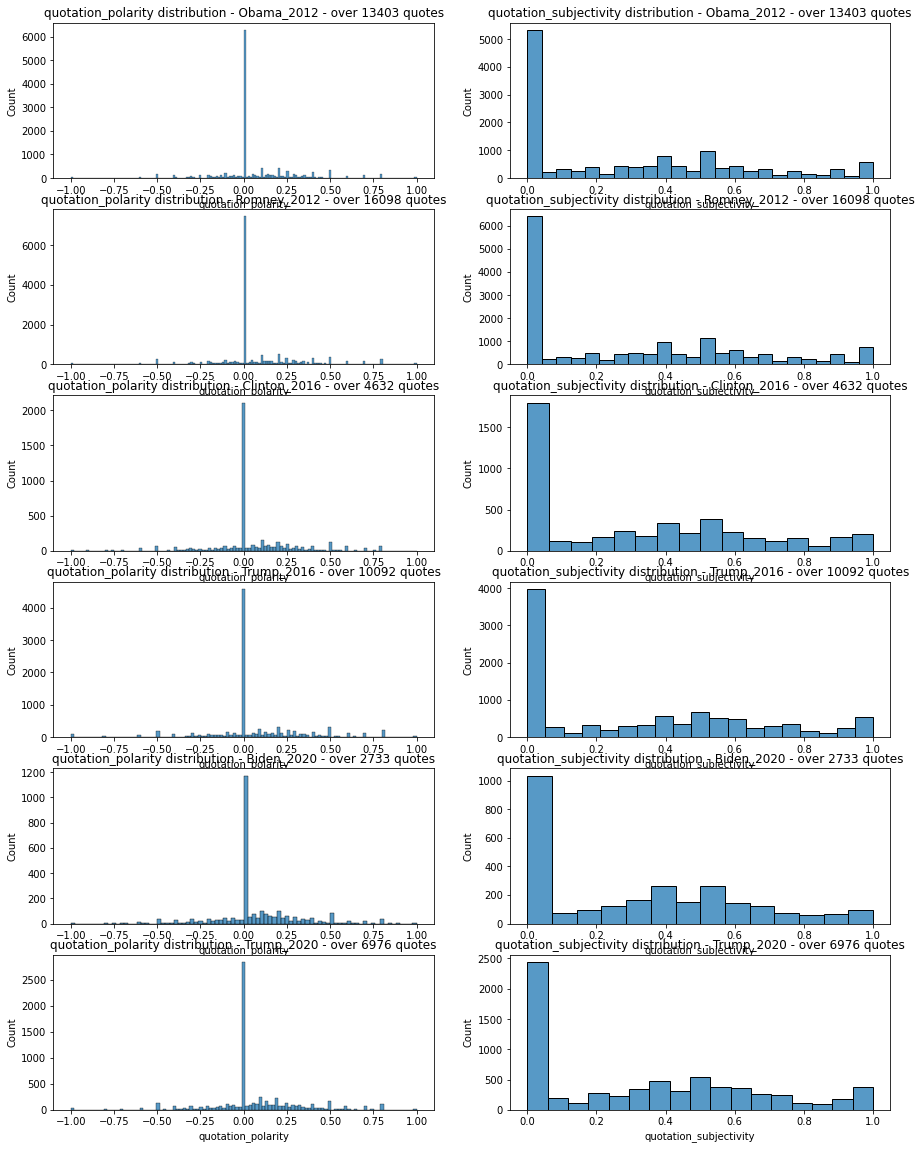

In [3]:
def plot_freq_distribution(array_of_candidate_with_all_quotes, columns):
    """
    Iterate over the array and plot the frequency distribution of the Series located at columns.
    :param array_of_candidate_with_all_quotes: array of dataframes with quotes of candidate.
    :param columns: name of columns of a dataframe to plot the values.
    """
    if 0 == len(columns) > 2:
        raise KeyError('columns should be length 1 or 2')

    fig, axes = plt.subplots(6, 1 * len(columns), figsize=(15, 40 / len(columns)))

    for i, df_candidate_year_sa in enumerate(array_of_candidate_with_all_quotes):
        for j, column in enumerate(columns):
            if len(columns) > 1:
                seaborn.histplot(df_candidate_year_sa[column], ax=axes[i][j])
                axes[i][j].set_title(
                    f'{column} distribution - {df_candidate_year_sa.name} - over {len(df_candidate_year_sa)} quotes')
            else:
                seaborn.histplot(df_candidate_year_sa[column], ax=axes[i])
                axes[i].set_title(
                    f'{column} distribution - {df_candidate_year_sa.name} - over {len(df_candidate_year_sa)} quotes')


plot_freq_distribution(
    [df_obama_2012_all_quotes, df_romney_2012_all_quotes, df_clinton_2016_all_quotes, df_trump_2016_all_quotes,
     df_biden_2020_all_quotes, df_trump_2020_all_quotes],
    COLUMNS)

We observe that the majority of quotes are analyzed as neutral. This could be a bias of the dataset as well as our sentiment analysis bias. We figured that the choice of stopwords to be removed from the strings is crucial to attributing positive or negative values. When comparing different models, we should pay attention to that.

## Timeline of polarity and subjectivity distribution over 2016 and 2020 elections

Now let's plot the polarity and subjectivity distributions over time aggregated by month and candidate.

In [23]:
def df_groupy_polarity_by_months(df_candidates, subjectivity=False):
    """
    Apply group by method on dataframe based on months and candidate.
    :param df_candidates: dataframe with ['month'] and ['quotation_polarity'] columns
    :param subjectivity: performs group by on ['quotation_subjectivity']
    :return: result as dataframe
    """
    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    # aggregate data over month and candidate
    groupyby_result_mean = df_candidates[['month', f'quotation_{metric}']].groupby([df_candidates.month, df_candidates.candidate]).mean()[
            f'quotation_{metric}']

    groupyby_result_std = df_candidates[['month', f'quotation_{metric}']].groupby([df_candidates.month, df_candidates.candidate]).std()[
        f'quotation_{metric}']

    # magic trick to convert to standard df
    st_df = pd.DataFrame(
        [[month, groupyby_result_mean.at[month][candidate], groupyby_result_std.at[month][candidate], candidate] for month, candidate in groupyby_result_mean.index],
        columns=['month', f'quotation_{metric}', f'quotation_{metric}_std', 'candidate'])
    return st_df

In [24]:
df_obama_romney_2012 = pd.concat([df_obama_2012_all_quotes, df_romney_2012_all_quotes], ignore_index=True)
df_trump_clinton_2016 = pd.concat([df_trump_2016_all_quotes, df_clinton_2016_all_quotes], ignore_index=True)
df_trump_biden_2020 = pd.concat([df_trump_2020_all_quotes, df_biden_2020_all_quotes], ignore_index=True)

# The quotes are aggregated and averaged by month and by candidate
df_2012_polarity_grouped_by_month = df_groupy_polarity_by_months(df_obama_romney_2012)
df_2016_polarity_grouped_by_month = df_groupy_polarity_by_months(df_trump_clinton_2016)
df_2020_polarity_grouped_by_month = df_groupy_polarity_by_months(df_trump_biden_2020)
df_2012_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2012'
df_2016_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2016'
df_2020_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2020'

print(df_2012_polarity_grouped_by_month)

if MODEL == 'TextBlob':
    df_2012_subjectivity_grouped_by_month = df_groupy_polarity_by_months(df_obama_romney_2012, subjectivity=True)
    df_2016_subjectivity_grouped_by_month = df_groupy_polarity_by_months(df_trump_clinton_2016, subjectivity=True)
    df_2020_subjectivity_grouped_by_month = df_groupy_polarity_by_months(df_trump_biden_2020, subjectivity=True)
    df_2012_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2012'
    df_2016_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2016'
    df_2020_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2020'

   month  quotation_polarity  quotation_polarity_std     candidate
0    Apr            0.066415                0.241462  Barack Obama
1    Apr            0.082157                0.261805   Mitt Romney
2    Aug            0.044476                0.235974  Barack Obama
3    Aug            0.072336                0.262719   Mitt Romney
4    Feb            0.053391                0.248729  Barack Obama
5    Feb            0.088583                0.261149   Mitt Romney
6    Jan            0.086240                0.238751  Barack Obama
7    Jan            0.078916                0.252506   Mitt Romney
8    Jul            0.045778                0.250834  Barack Obama
9    Jul            0.067838                0.248230   Mitt Romney
10   Jun            0.064293                0.246610  Barack Obama
11   Jun            0.070838                0.252167   Mitt Romney
12   Mar            0.048570                0.244606  Barack Obama
13   Mar            0.079387                0.270481   Mitt Ro

   month  quotation_polarity  quotation_polarity_std     candidate
0    Apr            0.066415                0.241462  Barack Obama
1    Apr            0.082157                0.261805   Mitt Romney
2    Aug            0.044476                0.235974  Barack Obama
3    Aug            0.072336                0.262719   Mitt Romney
4    Feb            0.053391                0.248729  Barack Obama
5    Feb            0.088583                0.261149   Mitt Romney
6    Jan            0.086240                0.238751  Barack Obama
7    Jan            0.078916                0.252506   Mitt Romney
8    Jul            0.045778                0.250834  Barack Obama
9    Jul            0.067838                0.248230   Mitt Romney
10   Jun            0.064293                0.246610  Barack Obama
11   Jun            0.070838                0.252167   Mitt Romney
12   Mar            0.048570                0.244606  Barack Obama
13   Mar            0.079387                0.270481   Mitt Ro

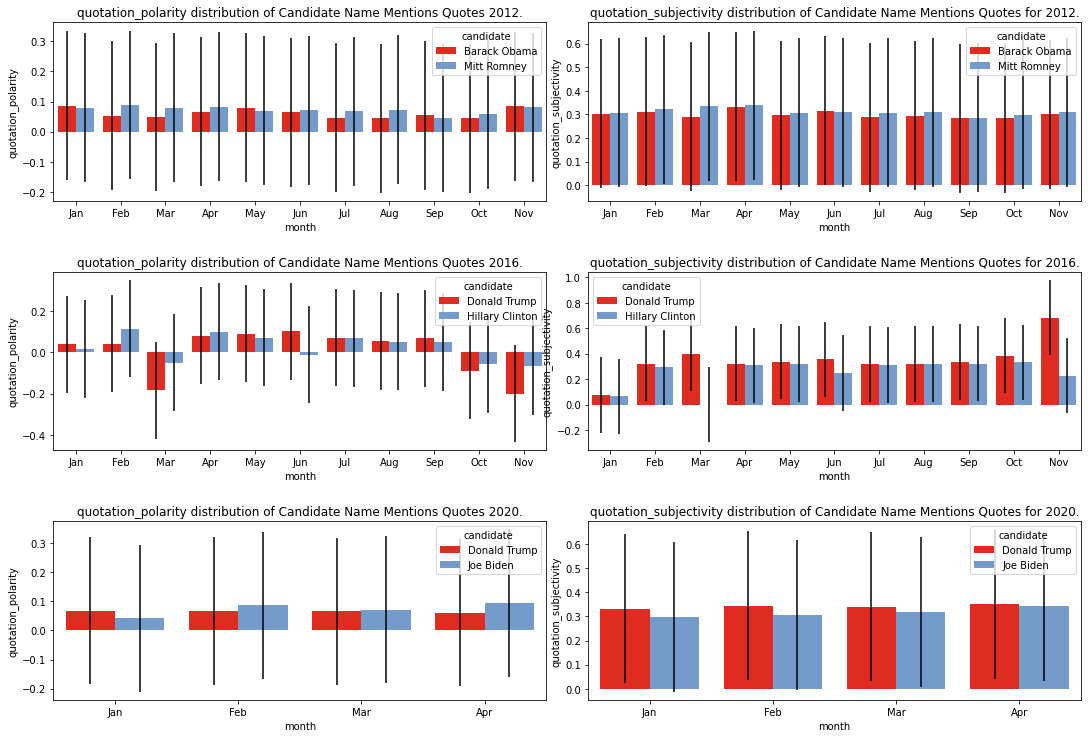

In [36]:
def plot_time_distribution(array_of_grouped_by_month, months, columns):
    """
    Iterate over the array and plot the frequency distribution of the Series located at columns.
    :param array_of_grouped_by_month: array of dataframes with aggregated quotes of candidate over months.
    :param months: categories
    :param columns: name of columns of a dataframe to plot the values.
    """
    if 0 == len(columns) > 2:
        raise KeyError('columns should be length 1 or 2')

    fig, axes = plt.subplots(3, 1 * len(columns), figsize=(15, 20 / len(columns)))
    fig.tight_layout(h_pad=5)

    for j, column in enumerate(columns):
        df_candidates_of_year = array_of_grouped_by_month[j]
        for i, candidate_of_year in enumerate(df_candidates_of_year):
            if len(columns) > 1:
                axes[i][j].set_title(f"{column} distribution of {candidate_of_year.name}.")
                print(candidate_of_year)
                seaborn.barplot(x='month', y=column, yerr=candidate_of_year[f'{column}_std'].mean(), data=candidate_of_year,
                                hue="candidate",
                                order=months[i + 1 // 2], ax=axes[i][j], palette=["#fe1100", '#6699d8'])
            else:
                axes[i].set_title(f"{column} distribution of {candidate_of_year.name}.")
                seaborn.barplot(x='month', y=column, yerr=candidate_of_year[f'{column}_std'].mean(), data=candidate_of_year,
                                hue="candidate",
                                order=months[i + 1 // 2], ax=axes[i], palette=["#fe1100", '#6699d8'])


months_2012 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2016 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2020 = ['Jan', 'Feb', 'Mar', 'Apr']

if MODEL == 'TextBlob':
    concat = [[df_2012_polarity_grouped_by_month, df_2016_polarity_grouped_by_month,
               df_2020_polarity_grouped_by_month],
              [df_2012_subjectivity_grouped_by_month, df_2016_subjectivity_grouped_by_month,
               df_2020_subjectivity_grouped_by_month]]
else:
    concat = [[df_2012_polarity_grouped_by_month, df_2016_polarity_grouped_by_month,
               df_2020_polarity_grouped_by_month]]

print(df_2012_polarity_grouped_by_month)

plot_time_distribution(concat, months=[months_2012, months_2016, months_2020],
                       columns=COLUMNS)

Unfortunately, the change in polarity (y-axis) from a month to another is very small in most cases which makes it difficult conclude a meaningful statistical change. However we observe a very different timeline for 2016 election.

Finally, the quotes from 2020 don't extend past April.

We now plot the same distribution grouped by weeks, for a more fine-grained visualisation.

In [10]:
def df_groupy_polarity_by_week(df_candidates, subjectivity=False):
    """
    Apply group by method on dataframe based on weeks and candidate.
    :param df_candidates: dataframe with ['week'] and ['quotation_polarity'] columns
    :param subjectivity: performs group by on ['quotation_subjectivity']
    :return: result as dataframe
    """
    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    df_candidates['week'] = df_candidates['date'].apply(
        lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").isocalendar()[1])

    # aggregate data over month and candidate
    groupby_result = df_candidates[['week', f'quotation_{metric}']].groupby([df_candidates.week, df_candidates.candidate]).mean()[
            f'quotation_{metric}']

    # magic trick to convert to standard df
    groupby_result = pd.DataFrame(
        [[week, groupby_result.at[week][candidate], candidate] for week, candidate in groupby_result.index],
        columns=['week', f'quotation_{metric}', 'candidate'])
    return groupby_result

In [11]:
df_obama_romney_2012 = pd.concat([df_obama_2012_all_quotes, df_romney_2012_all_quotes], ignore_index=True)
df_trump_clinton_2016 = pd.concat([df_trump_2016_all_quotes, df_clinton_2016_all_quotes], ignore_index=True)
df_trump_biden_2020 = pd.concat([df_trump_2020_all_quotes, df_biden_2020_all_quotes], ignore_index=True)

# The quotes are aggregated and averaged by week and by candidate
df_2012_polarity_grouped_by_week = df_groupy_polarity_by_week(df_obama_romney_2012)
df_2016_polarity_grouped_by_week = df_groupy_polarity_by_week(df_trump_clinton_2016)
df_2020_polarity_grouped_by_week = df_groupy_polarity_by_week(df_trump_biden_2020)
df_2012_polarity_grouped_by_week.name = 'Candidate Name Mentions Quotes 2012'
df_2016_polarity_grouped_by_week.name = 'Candidate Name Mentions Quotes 2016'
df_2020_polarity_grouped_by_week.name = 'Candidate Name Mentions Quotes 2020'

if MODEL == 'TextBlob':
    df_2012_subjectivity_grouped_by_week = df_groupy_polarity_by_week(df_obama_romney_2012, subjectivity=True)
    df_2016_subjectivity_grouped_by_week = df_groupy_polarity_by_week(df_trump_clinton_2016, subjectivity=True)
    df_2020_subjectivity_grouped_by_week = df_groupy_polarity_by_week(df_trump_biden_2020, subjectivity=True)
    df_2012_subjectivity_grouped_by_week.name = 'Candidate Name Mentions Quotes for 2012'
    df_2016_subjectivity_grouped_by_week.name = 'Candidate Name Mentions Quotes for 2016'
    df_2020_subjectivity_grouped_by_week.name = 'Candidate Name Mentions Quotes for 2020'

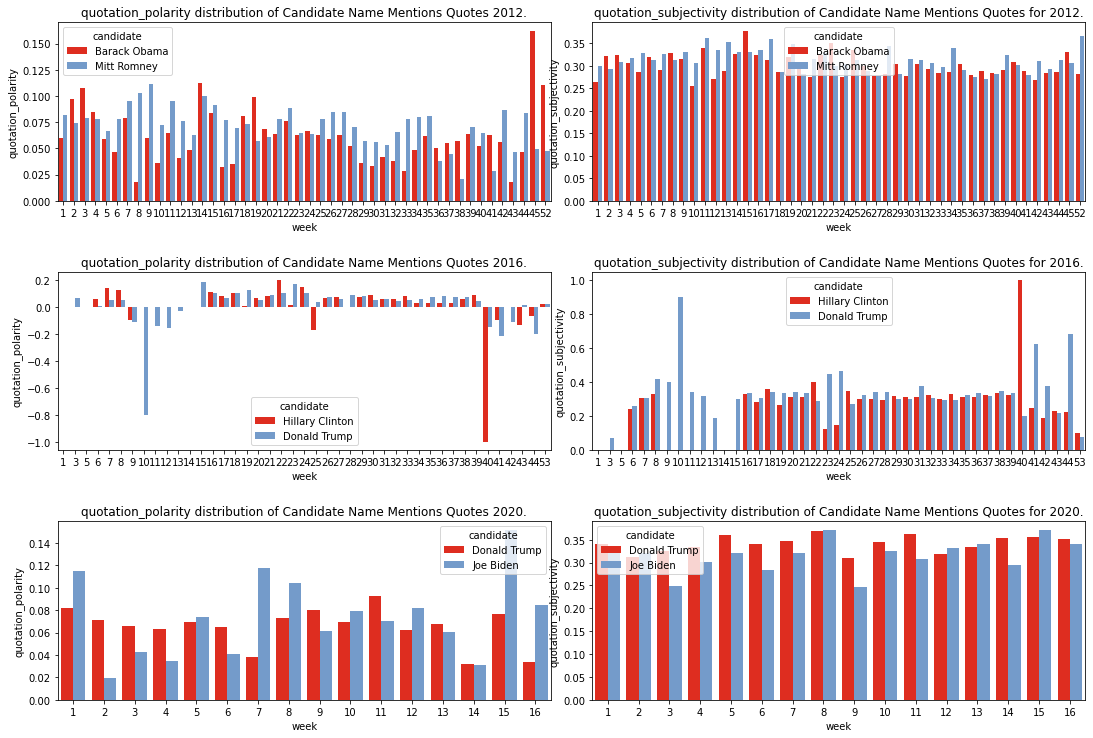

In [12]:
def display_distribution_over_weeks(df_candidates_of_year_arr, columns):
    """
    Iterate over the array and plot the frequency distribution of the Series located at columns.
    :param df_candidates_of_year_arr: array of dataframes with aggregated quotes of candidate over weeks.
    :param columns: name of columns of a dataframe to plot the values.
    """
    if 0 == len(columns) > 2:
        raise KeyError('columns should be length 1 or 2')

    fig, axes = plt.subplots(3, 1 * len(columns), figsize=(15, 20 / len(columns)))
    fig.tight_layout(h_pad=5)

    for j, column in enumerate(columns):
        df_candidates_of_year = df_candidates_of_year_arr[j]
        for i, candidate_of_year in enumerate(df_candidates_of_year):
            if len(columns) > 1:
                axes[i][j].set_title(f"{column} distribution of {candidate_of_year.name}.")
                seaborn.barplot(x='week', y=column, data=candidate_of_year,
                                hue="candidate", ax=axes[i][j], palette=["#fe1100", '#6699d8'])
            else:
                axes[i].set_title(f"{column} distribution of {candidate_of_year.name}.")
                seaborn.barplot(x='week', y=column, data=candidate_of_year,
                                hue="candidate", ax=axes[i], palette=["#fe1100", '#6699d8'])


if MODEL == 'TextBlob':
    concat = [[df_2012_polarity_grouped_by_week, df_2016_polarity_grouped_by_week,
               df_2020_polarity_grouped_by_week],
              [df_2012_subjectivity_grouped_by_week, df_2016_subjectivity_grouped_by_week,
               df_2020_subjectivity_grouped_by_week]]
else:
    concat = [[df_2012_polarity_grouped_by_week, df_2016_polarity_grouped_by_week,
               df_2020_polarity_grouped_by_week]]

display_distribution_over_weeks(concat, columns=COLUMNS)

## Wordcloud of positive and negative quotes (80% threshold)

A simple way to visualise assess the correctness of our sentiment analysis is to plot the word cloud related to the most positive or negatives quotes (>80%). We can visually see if the most present words have indeed a positive/negative connotation.

In [40]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def plot_word_cloud(type_, string: str, filter_keywords=[]):
    for keyword in filter_keywords:
        string = string.replace(keyword, '')

    string_split = Counter(string.split(' '))
    counts = {k: v for k, v in string_split.most_common(200)}

    fig = plt.figure(figsize=(15, 15))
    plt.title('word cloud ' + type_, fontsize=30, pad=25)
    wordcloud = WordCloud(background_color="white", contour_width=3,
                          contour_color='steelblue').generate_from_frequencies(counts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [41]:
def extract_positive_sentiment(df_quotes, threshold=0.5):
    ada_threshold = df_quotes['quotation_polarity'].quantile(q=threshold)
    print(f'ada threshold {ada_threshold}')
    positive_quotes = df_quotes[df_quotes['quotation_polarity'] > ada_threshold]
    return positive_quotes


def extract_negative_sentiment(df_quotes, threshold=0.5):
    ada_threshold = df_quotes['quotation_polarity'].quantile(q=1 - threshold)
    print(f'ada threshold {ada_threshold}')
    negative_quotes = df_quotes[df_quotes['quotation_polarity'] < ada_threshold]
    return negative_quotes

ada threshold 0.1666666666666666
ada threshold 0.0


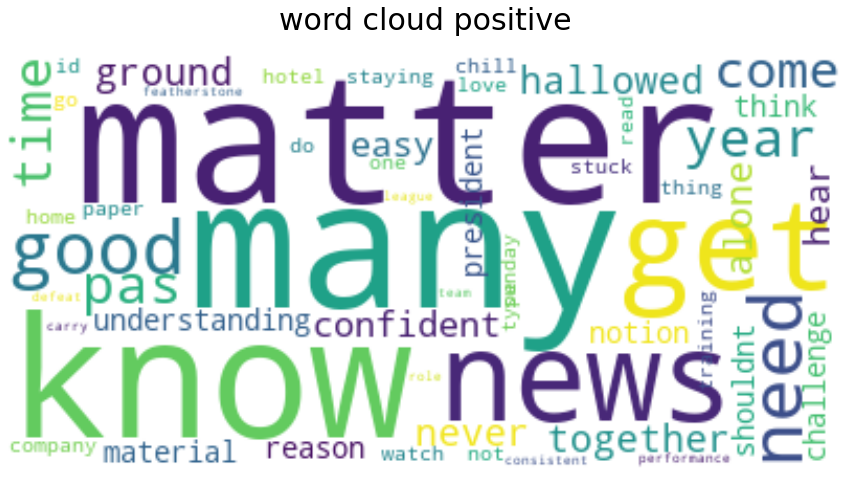

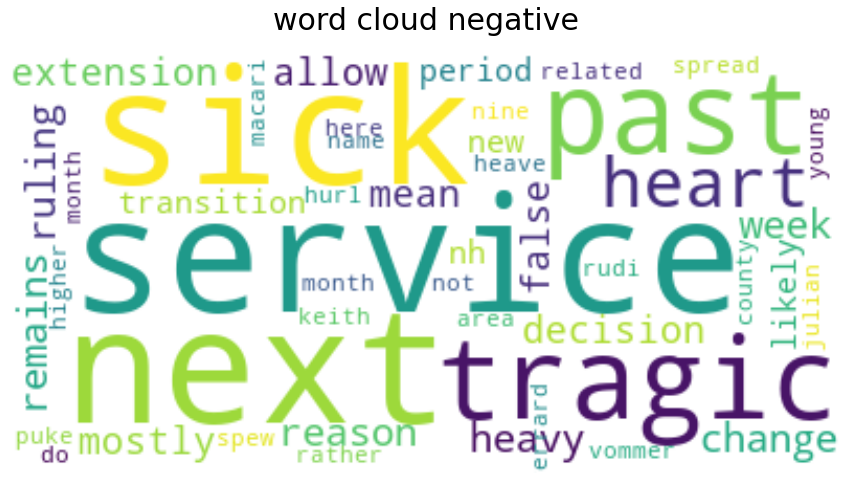

In [45]:
# filter quotes with only positive polarity (>0.8) which corresponds to a higher confidence in prediction.
positive_pol_quotes = extract_positive_sentiment(df_obama_romney_2012, threshold=0.75)
negative_pol_quotes = extract_negative_sentiment(df_obama_romney_2012, threshold=0.75)

positive_long_string = remove_punct(''.join(str(positive_pol_quotes['quotation_conc_lemmatized'].values)))

negative_long_string = remove_punct(''.join(str(negative_pol_quotes['quotation_conc_lemmatized'].values)))

plot_word_cloud('positive', positive_long_string, filter_keywords=['mitt', 'romney', 'barack', 'obama'])
plot_word_cloud('negative', negative_long_string, filter_keywords=['mitt', 'romney', 'barack', 'obama'])

Our initial baseline sentiment analysis implementation seems to be working properly i.e the most positive/negative quoted words have positive/negative meaning. Furthermore, We need a golden standard to compute the true accuracy.

## Plot media coverage's polarity vs vote intentions

We will now partition the quotes by polarity : positive/negative, aggregate them by month and compare with vote intentions.

   month     candidate  positivity
0    Apr  Barack Obama    0.397838
1    Apr   Mitt Romney    0.411567
2    Aug  Barack Obama    0.356838
3    Aug   Mitt Romney    0.368859
4    Feb  Barack Obama    0.331933
5    Feb   Mitt Romney    0.380032
6    Jan  Barack Obama    0.389712
7    Jan   Mitt Romney    0.369374
8    Jul  Barack Obama    0.338519
9    Jul   Mitt Romney    0.366343
10   Jun  Barack Obama    0.384393
11   Jun   Mitt Romney    0.385425
12   Mar  Barack Obama    0.343083
13   Mar   Mitt Romney    0.403756
14   May  Barack Obama    0.400361
15   May   Mitt Romney    0.380048
16   Nov  Barack Obama    0.374517
17   Nov   Mitt Romney    0.407018
18   Oct  Barack Obama    0.328786
19   Oct   Mitt Romney    0.361982
20   Sep  Barack Obama    0.345283
21   Sep   Mitt Romney    0.315370


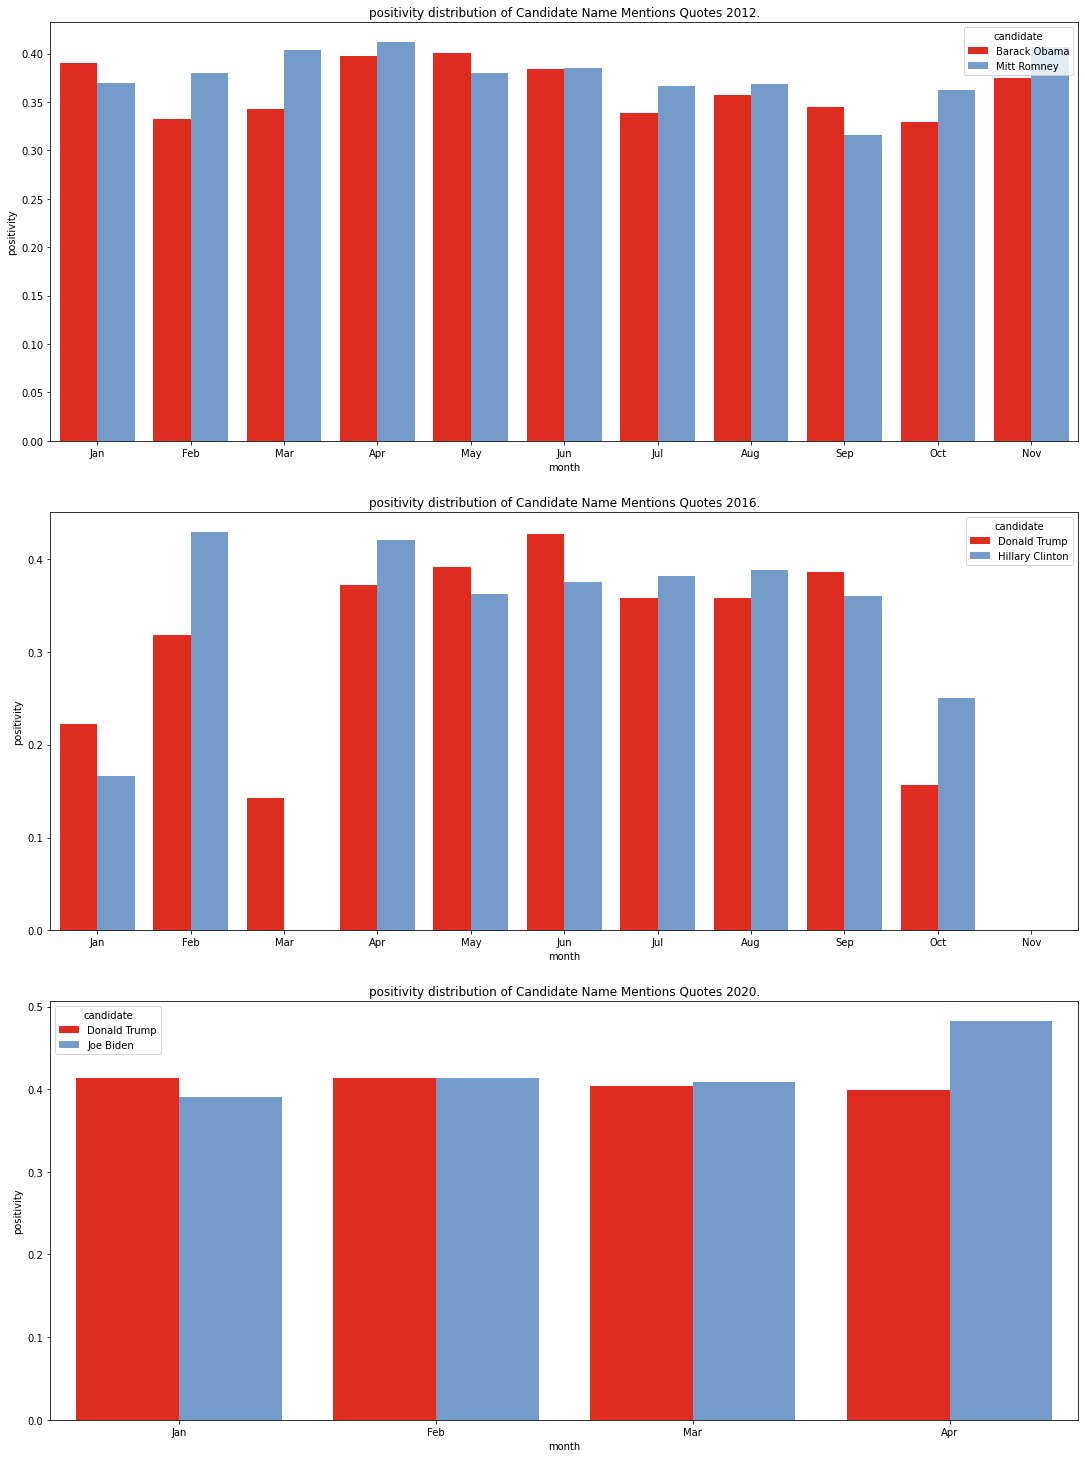

In [16]:
def partition_quotes_by_polarity(df, threshold=0):
    """
    Separate negative quotes from positive quotes and return them as a pair.
    :param df: dataframe with ['quotation_polarity] column
    :param threshold: with which to consider negative/positive
    :return: spited dataframe by positive/negative quotes
    """
    return df[df['quotation_polarity'] > threshold], df[df['quotation_polarity'] <= threshold]


def df_groupy_polarity_by_months_by_count(df_candidates, subjectivity=False):
    """
    Apply group by function on dataframe based on months. Aggregate the quotes with count().
    :param df_candidates: dataframe with ['quotation_polarity'] column.
    :param subjectivity: boolean, if set to true performes group by on subjectivity instead of polarity.
    :return: result as dataframe.
    """
    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    # aggregate data over month and candidate
    groupyby_result = df_candidates[['month', f'quotation_{metric}']].groupby([df_candidates.month, df_candidates.candidate]).count()[
            f'quotation_{metric}']

    # magic trick to convert to standard df
    st_df = pd.DataFrame(
        [[month, groupyby_result.at[month][candidate], candidate] for month, candidate in groupyby_result.index],
        columns=['month', f'quotation_{metric}', 'candidate'])
    return st_df


# partition quotes by polarity count
df_obama_romney_2012_pos, df_obama_romney_2012_neg = partition_quotes_by_polarity(df_obama_romney_2012)
df_trump_clinton_2016_pos, df_trump_clinton_2016_neg = partition_quotes_by_polarity(df_trump_clinton_2016)
df_trump_biden_2020_pos, df_trump_biden_2020_neg = partition_quotes_by_polarity(df_trump_biden_2020)

# group by quotes by months
df_obama_romney_2012_by_month = df_groupy_polarity_by_months_by_count(df_obama_romney_2012)
df_obama_romney_2012_pos_by_month = df_groupy_polarity_by_months_by_count(df_obama_romney_2012_pos)
df_obama_romney_2012_neg_by_month = df_groupy_polarity_by_months_by_count(df_obama_romney_2012_neg)

df_trump_clinton_2016_by_month = df_groupy_polarity_by_months_by_count(df_trump_clinton_2016)
df_trump_clinton_2016_pos_by_month = df_groupy_polarity_by_months_by_count(df_trump_clinton_2016_pos)
df_trump_clinton_2016_neg_by_month = df_groupy_polarity_by_months_by_count(df_trump_clinton_2016_neg)

df_trump_biden_2020_by_month = df_groupy_polarity_by_months_by_count(df_trump_biden_2020)
df_trump_biden_2020_pos_by_month = df_groupy_polarity_by_months_by_count(df_trump_biden_2020_pos)
df_trump_biden_2020_neg_by_month = df_groupy_polarity_by_months_by_count(df_trump_biden_2020_neg)

# we define 'positivity' as positivity = #positive_quotes / total_number_of_quotes
df_obama_romney_2012_by_month['positivity'] = df_obama_romney_2012_pos_by_month['quotation_polarity'] / \
                                        df_obama_romney_2012_by_month['quotation_polarity']
df_obama_romney_2012_by_month.drop(['quotation_polarity'], axis=1, inplace=True)

df_trump_clinton_2016_by_month['positivity'] = (df_trump_clinton_2016_by_month['quotation_polarity'] -
                                                df_trump_clinton_2016_neg_by_month['quotation_polarity']) / \
                                               df_trump_clinton_2016_by_month['quotation_polarity']
df_trump_clinton_2016_by_month.drop(['quotation_polarity'], axis=1, inplace=True)

df_trump_biden_2020_by_month['positivity'] = df_trump_biden_2020_pos_by_month['quotation_polarity'] / \
                                             df_trump_biden_2020_by_month['quotation_polarity']
df_trump_biden_2020_by_month.drop(['quotation_polarity'], axis=1, inplace=True)

df_obama_romney_2012_by_month.name = 'Candidate Name Mentions Quotes 2012'
df_trump_clinton_2016_by_month.name = 'Candidate Name Mentions Quotes 2016'
df_trump_biden_2020_by_month.name = 'Candidate Name Mentions Quotes 2020'

concat = [[df_obama_romney_2012_by_month, df_trump_clinton_2016_by_month, df_trump_biden_2020_by_month]]

plot_time_distribution(concat, months=[months_2012, months_2016, months_2020], columns=['positivity'])

In [20]:
# import vote intentions
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

df_2012 = pd.read_csv('../Data/Scrapped/polls_2012.csv').rename(
    columns={"Obama (D)": "Barack Obama", "Romney (R)": "Mitt Romney"})
df_2016 = pd.read_csv('../Data/Scrapped/polls_2016.csv').rename(
    columns={"Clinton (D)": "Hillary Clinton", "Trump (R)": "Donald Trump"})
df_2020 = pd.read_csv('../Data/Scrapped/polls_2020.csv').rename(
    columns={"Biden (D)": "Joe Biden", "Trump (R)": "Donald Trump"})


In [27]:
def convert_vote_intentions_df(df, candidates):
    """
    Adapter pattern to match the format used with previous data
    :param df: dataframe read from polls.csv
    :param candidates:
    :return:
    """
    df['month'] = df.index
    df_vote_intentions = pd.DataFrame(columns=['month', 'candidate', 'vote_intention'])

    for month in df['month']:
        candidate1 = {'month': [month], 'candidate': [candidates[0]], 'vote_intention': [df[candidates[0]][month]]}
        candidate2 = {'month': [month], 'candidate': [candidates[1]], 'vote_intention': [df[candidates[1]][month]]}
        df_candidate1 = pd.DataFrame(candidate1)
        df_candidate2 = pd.DataFrame(candidate2)
        df_vote_intentions = pd.concat([df_vote_intentions, df_candidate1], axis=0)
        df_vote_intentions = pd.concat([df_vote_intentions, df_candidate2], axis=0)
    df_vote_intentions.reset_index(inplace=True)
    df_vote_intentions.drop(['index'], axis=1, inplace=True)
    return df_vote_intentions


df_2012_vote_intentions = convert_vote_intentions_df(df_2012, ['Barack Obama', 'Mitt Romney'])
df_2016_vote_intentions = convert_vote_intentions_df(df_2016, ['Hillary Clinton', 'Donald Trump'])
df_2020_vote_intentions = convert_vote_intentions_df(df_2020, ['Joe Biden', 'Donald Trump'])
df_obama_romney_2012_by_month['vote_intention'] = df_2012_vote_intentions['vote_intention']
df_trump_clinton_2016_by_month['vote_intention'] = df_2016_vote_intentions['vote_intention']
df_trump_biden_2020_by_month['vote_intention'] = df_2020_vote_intentions['vote_intention']

In [2]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20), sharey=False, sharex=True)

axes[0].set_title('2012')
sns.barplot(x='month', y='vote_intention', hue='candidate', order=months_2012, data=df_obama_romney_2012_by_month,
            ax=axes[0], palette=["#fe1100", '#6699d8'])
ax2 = axes[0].twinx()
sns.lineplot(x='month', y='positivity', hue='candidate', data=df_obama_romney_2012_by_month, ax=ax2,
             palette=["#16000b", '#a49c94'], size='candidate')

axes[1].set_title('2016')
sns.barplot(x='month', y='vote_intention', hue='candidate', order=months_2016, data=df_trump_clinton_2016_by_month,
            ax=axes[1], palette=["#fe1100", '#6699d8'])
ax2 = axes[1].twinx()
sns.lineplot(x='month', y='positivity', hue='candidate', data=df_trump_clinton_2016_by_month, ax=ax2,
             palette=["#16000b", '#a49c94'], size='candidate')

axes[2].set_title('2020')
sns.barplot(x='month', y='vote_intention', hue='candidate', order=months_2020, data=df_trump_biden_2020_by_month,
            ax=axes[2], palette=["#fe1100", '#6699d8'])
ax2 = axes[2].twinx()
sns.lineplot(x='month', y='positivity', hue='candidate', data=df_trump_biden_2020_by_month, ax=ax2,
             palette=["#16000b", '#a49c94'], size='candidate')


NameError: name 'plt' is not defined